<a href="https://colab.research.google.com/github/0sinach1/fraud-detection-project/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fraud analysis project
This notebook explores and models online payment fraud using a real-world dataset.

## 1. Import Libraries
We start by importing the necessary Python libraries for data analysis and visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Dataset
Load the online payments dataset for analysis.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
file_path = "/content/drive/MyDrive/Datasets/online_payments.csv"
df = pd.read_csv(file_path)
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1530544995,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [8]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


## 4. Data Visualization
Visualize transaction types, fraud distribution, and transaction amounts.

<Axes: xlabel='type'>

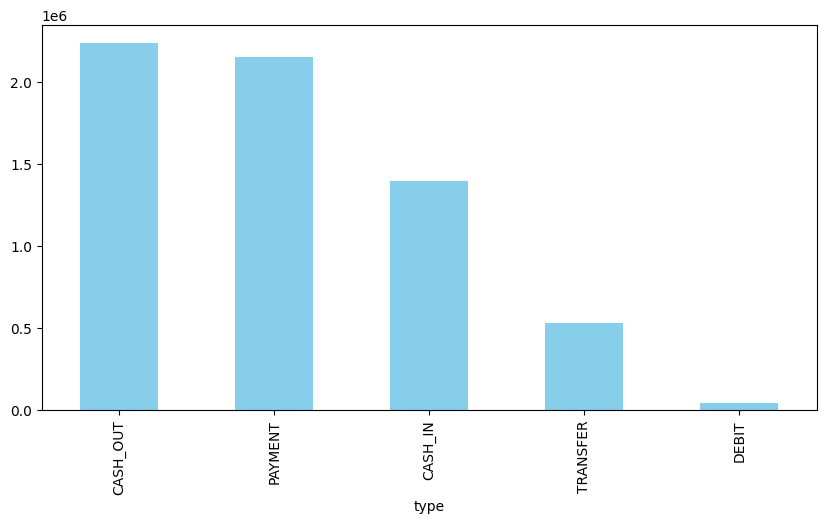

In [9]:
df['type'].value_counts().plot(kind='bar', figsize=(10, 5), color='skyblue')

<Axes: xlabel='type'>

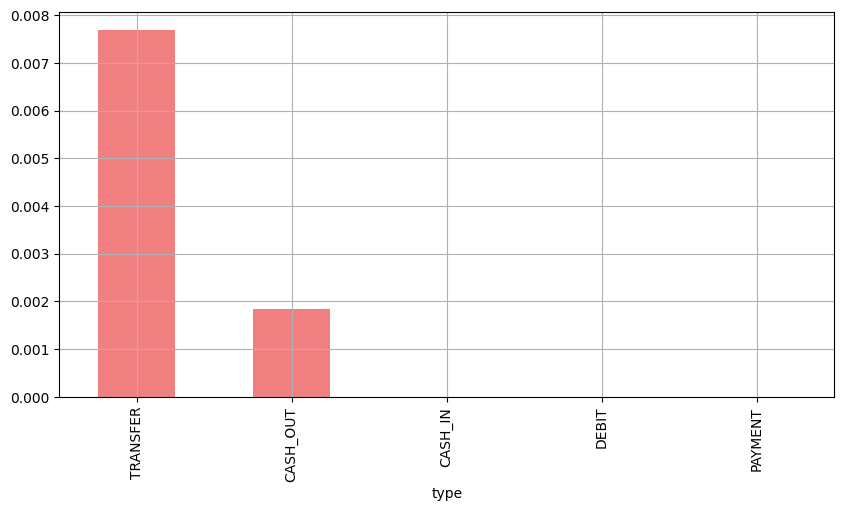

In [10]:
df.groupby('type')['isFraud'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), color='lightcoral',grid=True)

In [11]:
df['amount'].describe().astype(int)

,amount
count,6362620
mean,179861
std,603858
min,0
25%,13389
50%,74871
75%,208721
max,92445516


<Axes: xlabel='amount', ylabel='Count'>

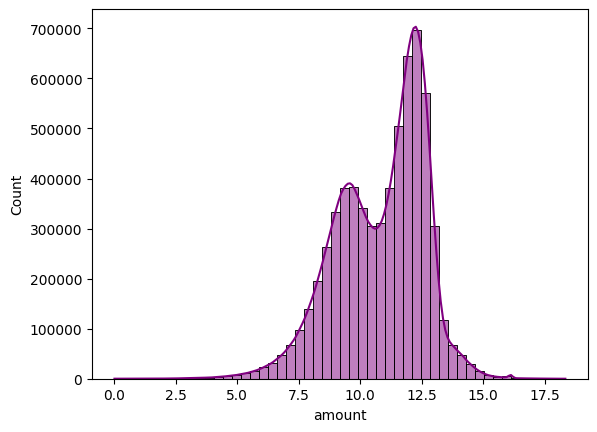

In [14]:
sns.histplot(np.log1p(df['amount']), bins=50, kde=True, color='purple', edgecolor='black')

## 5. Feature Engineering
Create new features and analyze their impact on fraud detection.

In [15]:
df['balanceDiffOrg'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

In [16]:
(df['balanceDiffOrg'] < 0).sum()

np.int64(1399253)

In [17]:
(df['balanceDiffDest'] < 0).sum()

np.int64(1238864)

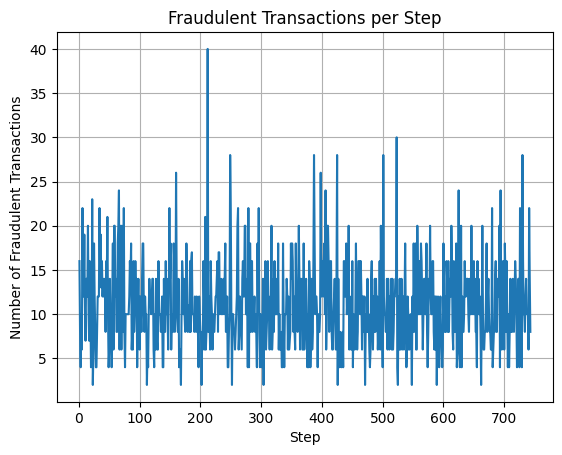

In [18]:
frauds_per_step = df[df['isFraud'] == 1]['step'].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label='Fraudulent Transactions')
plt.xlabel('Step')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Fraudulent Transactions per Step')
plt.grid(True)
plt.show()

In [19]:
df.drop(columns= 'step', inplace=True)

## 6. Top Senders and Receivers
Identify the most active senders and receivers in the dataset.

In [20]:
top_senders = df['nameOrig'].value_counts().head(10)

In [21]:
top_senders

,count
nameOrig,
C1530544995,3
C545315117,3
C724452879,3
C1784010646,3
C1677795071,3
C1462946854,3
C1065307291,3
C1999539787,3
C2098525306,3


In [22]:
top_receivers = df['nameDest'].value_counts().head(10)

In [23]:
top_receivers

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101
C1590550415,101
C1789550256,99
C451111351,99
C1360767589,98


## 7. Fraud Analysis by Type
Analyze fraud occurrences by transaction type.

In [25]:
fraud_types = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]

In [26]:
fraud_types['type'].value_counts()


,count
type,
CASH_OUT,2237500
TRANSFER,532909


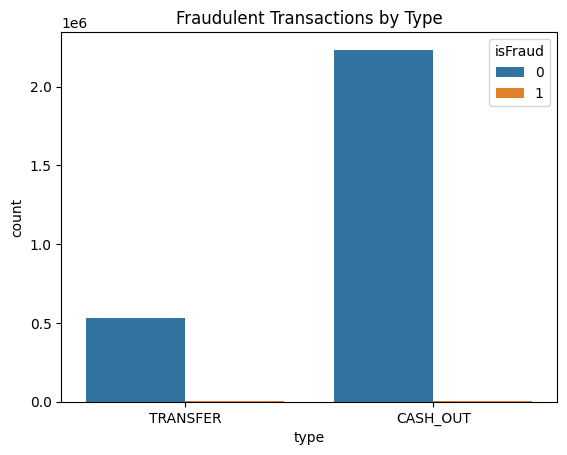

In [27]:
sns.countplot(data=fraud_types, x='type', hue='isFraud')
plt.title('Fraudulent Transactions by Type')
plt.show()

## 8. Correlation Analysis
Examine correlations between features and fraud.

In [28]:
corr = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()

In [29]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


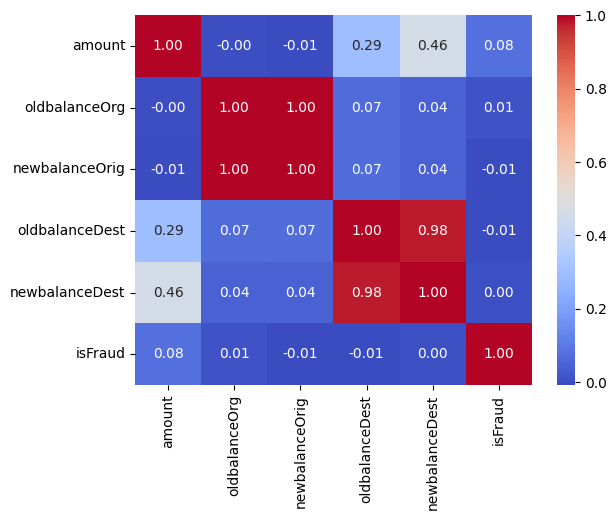

In [30]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [31]:
zero_after_transfer = df[
    (df['oldbalanceOrg'] > 0) &
    (df['newbalanceOrig'] == 0) &
    (df['type'].isin(['TRANSFER', 'CASH_OUT']))
]

In [32]:
len(zero_after_transfer)

1188074

In [33]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


## 9. Data Preparation for Modeling
Prepare the data for machine learning by selecting features and splitting into train/test sets.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [35]:
df_model = df.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

In [36]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrg,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


## 10. Model Building
Build and train a logistic regression model to detect fraud.

In [43]:
categorical = ['type']
numeric = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

In [44]:
y = df_model['isFraud']
X = df_model.drop(columns=['isFraud'], axis=1)

In [45]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, stratify=y)

In [46]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(drop='first'), categorical)
    ],
    remainder='drop'
)

In [47]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
])

In [48]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

## 11. Model Evaluation
Evaluate the model's performance using classification metrics and confusion matrix.

In [49]:
ypred = pipeline.predict(X_test)

In [50]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   4448085
           1       0.02      0.93      0.04      5749

    accuracy                           0.95   4453834
   macro avg       0.51      0.94      0.51   4453834
weighted avg       1.00      0.95      0.97   4453834



In [51]:
confusion_matrix(y_test, ypred)

array([[4219487,  228598],
       [    374,    5375]])

In [52]:
print(f'This model has {round(pipeline.score(X_test, y_test), 2) * 100}% accuracy')

This model has 95.0% accuracy


In [53]:
import joblib
joblib.dump(pipeline, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']